In [33]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.


In [34]:
df_BANK_marketing=df['BANK_marketing']

In [35]:
df_BANK_marketing.head()


,id,age,job,marital,education,faltante,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,6,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [36]:
df_BANK_marketing

,id,age,job,marital,education,faltante,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,6,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,11159,33,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11158,11160,39,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11159,11161,32,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11160,11162,43,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


## 1. Dataset con limpieza de datos

Ya tenemos todos los datos limpios y esto se puede comprobar, ya que ya no tenemos null. En principio, no deberían haber outliers


In [37]:
df_BANK_marketing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         11162 non-null  int64 
 1   age        11162 non-null  int64 
 2   job        11162 non-null  object
 3   marital    11162 non-null  object
 4   education  11162 non-null  object
 5   faltante   11162 non-null  int64 
 6   balance    11162 non-null  int64 
 7   housing    11162 non-null  int64 
 8   loan       11162 non-null  int64 
 9   contact    11162 non-null  object
 10  day        11162 non-null  int64 
 11  month      11162 non-null  object
 12  duration   11162 non-null  int64 
 13  campaign   11162 non-null  int64 
 14  pdays      11162 non-null  int64 
 15  previous   11162 non-null  int64 
 16  poutcome   11162 non-null  object
 17  deposit    11162 non-null  int64 
dtypes: int64(12), object(6)
memory usage: 1.5+ MB


In [38]:
df_BANK_marketing['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [39]:
df_BANK_marketing['marital'].value_counts()

marital
married     6354
single      3517
divorced    1291
Name: count, dtype: int64

In [40]:
df_BANK_marketing['education'].value_counts()

education
secondary    5479
tertiary     3687
primary      1500
unknown       496
Name: count, dtype: int64

In [41]:
df_BANK_marketing['faltante'].value_counts()

faltante
0    10994
1      168
Name: count, dtype: int64

In [42]:
df_BANK_marketing['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [43]:
df_BANK_marketing['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

## 2. Análisis exploratorio de datos (EDA)

In [44]:
df_BANK_vista_marketing=df_BANK_marketing[['id','contact','day','month','duration','campaign','pdays','previous','poutcome','deposit']]

In [45]:
df_BANK_vista_marketing.describe()

,id,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5582.499910,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,3222.336342,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,2792.250000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,5582.500000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,8372.750000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,11163.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


### 2.1 Recodificación columna poutcome

In [46]:
df_BANK_vista_marketing.head()

,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,unknown,5,may,1042,1,-1,0,unknown,1
1,3,unknown,5,may,1467,1,-1,0,unknown,1
2,4,unknown,5,may,1389,1,-1,0,unknown,1
3,5,unknown,5,may,579,1,-1,0,unknown,1
4,6,unknown,5,may,673,2,-1,0,unknown,1


In [47]:
def recod_poutcome(serie):

    match serie:

        case 'unknown':
          return 0
        case 'other':
          return 0
        case 'failure':
          return 0
        case 'success':
          return 1
       
df_BANK_vista_marketing["recod_poutcome"]=df_BANK_vista_marketing["poutcome"].apply(recod_poutcome)

df_BANK_vista_marketing

C:\Users\gorka\AppData\Local\Temp\ipykernel_40600\1059009831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing["recod_poutcome"]=df_BANK_vista_marketing["poutcome"].apply(recod_poutcome)


,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,recod_poutcome
0,1,unknown,5,may,1042,1,-1,0,unknown,1,0
1,3,unknown,5,may,1467,1,-1,0,unknown,1,0
2,4,unknown,5,may,1389,1,-1,0,unknown,1,0
3,5,unknown,5,may,579,1,-1,0,unknown,1,0
4,6,unknown,5,may,673,2,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11157,11159,cellular,20,apr,257,1,-1,0,unknown,0,0
11158,11160,unknown,16,jun,83,4,-1,0,unknown,0,0
11159,11161,cellular,19,aug,156,2,-1,0,unknown,0,0
11160,11162,cellular,8,may,9,2,172,5,failure,0,0


In [48]:
filter_deposit_1=df_BANK_vista_marketing['deposit']==1
filter_deposit_0=df_BANK_vista_marketing['deposit']==0

df_BANK_vista_marketing[filter_deposit_1]

,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,recod_poutcome
0,1,unknown,5,may,1042,1,-1,0,unknown,1,0
1,3,unknown,5,may,1467,1,-1,0,unknown,1,0
2,4,unknown,5,may,1389,1,-1,0,unknown,1,0
3,5,unknown,5,may,579,1,-1,0,unknown,1,0
4,6,unknown,5,may,673,2,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5284,5286,cellular,8,apr,335,1,-1,0,unknown,1,0
5285,5287,cellular,27,oct,102,1,180,3,success,1,1
5286,5288,cellular,22,apr,138,2,-1,0,unknown,1,0
5287,5289,cellular,28,jul,431,2,-1,0,unknown,1,0


Hago un histograma para ver la distribución del número de llamadas de la campaña actual

Histograma de la distribución de llamadas para los clientes que contratan depósitos y para los que no


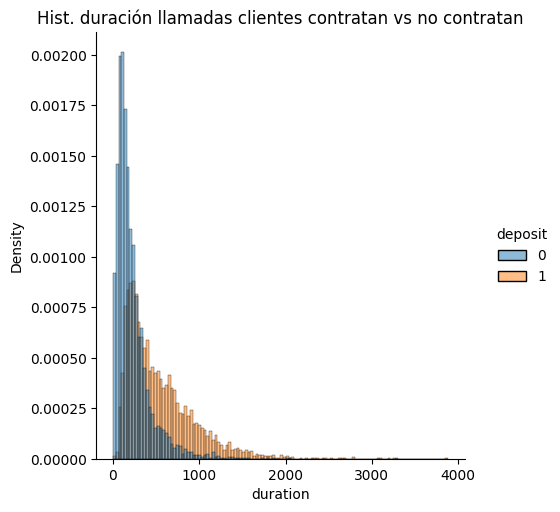

In [49]:
# Graficamos el histograma con seaborn displot
sns.displot(data=df_BANK_vista_marketing,x="duration", kde=False, stat='density',hue='deposit')
plt.title('Hist. duración llamadas clientes contratan vs no contratan',loc='center')
plt.show()


Se pude comprobar que parecen dos distribuciones distintas, así que el análisis de anómalos lo podemos hacer por cada función de distribución.


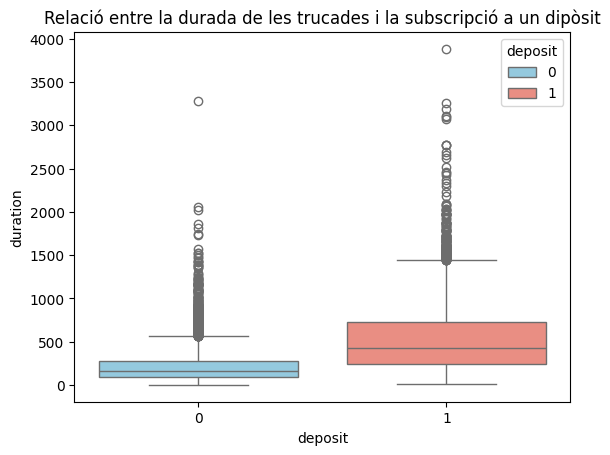

In [50]:
# Crear un boxplot per veure la distribució de la durada segons si s'ha subscrit al dipòsit
custom_palette = ['skyblue', 'salmon']
sns.boxplot(x='deposit', y='duration', data=df_BANK_vista_marketing,hue="deposit",palette=custom_palette)
plt.title('Relació entre la durada de les trucades i la subscripció a un dipòsit')
plt.show()


In [51]:
filtro_deposit_1=df_BANK_vista_marketing['deposit']==1

def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR

    min_Q_ext=Q1 - 3*IQR
    max_Q_ext=Q3 + 3*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext

Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles(df_BANK_vista_marketing[filtro_deposit_1]['duration'])

def clasificacion_duration(valor):
    
    if  valor < min_Q_ext:
        return "extremo muy bajo"
    elif valor < min_Q:
        return "muy bajo"
    elif valor < Q1:
        return "bajo"
    elif valor < Q2:
        return "medio-bajo"
    elif valor < Q3:
        return "medio-alto"
    elif valor < max_Q:
        return "alto"
    elif valor < max_Q_ext:
        return "muy alto"
    else:
        return "extremo muy alto"
df_BANK_vista_marketing["descripcion_duration"] = df_BANK_vista_marketing["duration"].apply(clasificacion_duration)



C:\Users\gorka\AppData\Local\Temp\ipykernel_40600\1238332856.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing["descripcion_duration"] = df_BANK_vista_marketing["duration"].apply(clasificacion_duration)


In [52]:
filter_sin_anom_duration=(df_BANK_vista_marketing["descripcion_duration"]!="muy alto") & (df_BANK_vista_marketing["descripcion_duration"]!="extremo muy alto")
filter_sin_anom_duration.value_counts()

descripcion_duration
True     10982
False      180
Name: count, dtype: int64

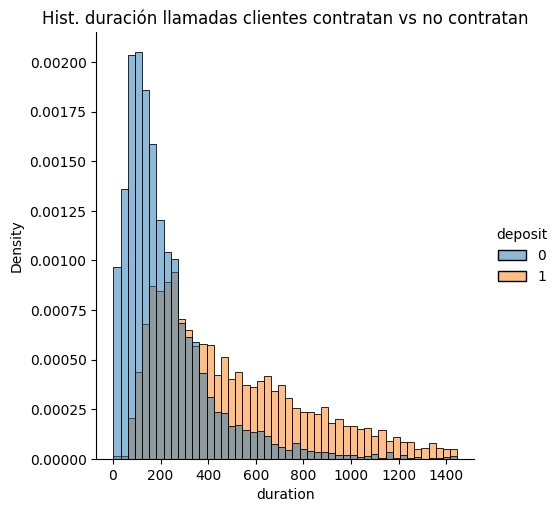

In [53]:
# Graficamos el histograma con seaborn displot
sns.displot(data=df_BANK_vista_marketing[filter_sin_anom_duration],x="duration", kde=False, stat='density', hue='deposit')
plt.title('Hist. duración llamadas clientes contratan vs no contratan',loc='center')
plt.show()


Text(0.5, 1.0, 'Hist. número campaign')

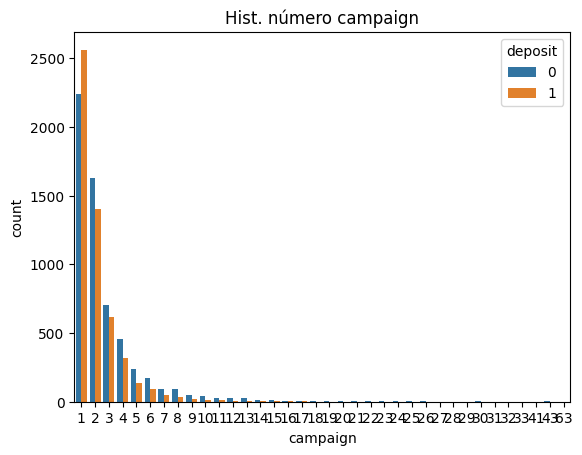

In [54]:
variable_categ="campaign"
g=sns.countplot(x=variable_categ,data=df_BANK_vista_marketing,hue='deposit')
plt.title('Hist. número campaign',loc='center')

In [55]:
Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles(df_BANK_vista_marketing[filtro_deposit_1]['campaign'])
df_BANK_vista_marketing["descripcion_campaign"] = df_BANK_vista_marketing["campaign"].apply(clasificacion_duration)
filter_campaign_extre_muy_alto=(df_BANK_vista_marketing["descripcion_campaign"]!="extremo muy alto") & (df_BANK_vista_marketing["descripcion_campaign"]!="muy alto")




C:\Users\gorka\AppData\Local\Temp\ipykernel_40600\2337064802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing["descripcion_campaign"] = df_BANK_vista_marketing["campaign"].apply(clasificacion_duration)


In [56]:
filter_campaign_extre_muy_alto.value_counts()

descripcion_campaign
True     10296
False      866
Name: count, dtype: int64

Text(0.5, 1.0, 'Hist. número campaign')

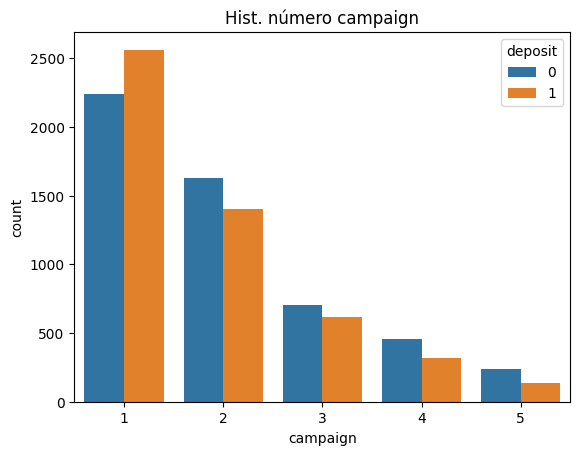

In [57]:
variable_categ="campaign"
g=sns.countplot(x=variable_categ,data=df_BANK_vista_marketing[filter_campaign_extre_muy_alto],hue='deposit')
plt.title('Hist. número campaign',loc='center')

## 3. Análisis para encontrar un estimador de probabilidad de contratación de depósitos

**Creo finalmente, que con las duraciones que hemos encontrado sabemos que por encima, la probabilidad de que no se contrate es practicamente nula** 

Después de hacer este análisis, otra cosa que se me ocurre es que tengo las duraciones de las llamadas del dataset y lo puedo dividir en rangos de tiempo. Por ejemplo llamadas entre 100-2000 segundos y ver la tasa de conversión de depósitos contratados. La tasa de conversión, sería como una estimación de probabilidad de éxito para estos rangos de tiempo.








Quiero trocear el segmento duración en trocitos más pequeños, pero para eso quiero ver los estadísticos princiaples

In [59]:
df_BANK_marketing['duration'].describe()

count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

In [60]:
filter_sin_anomalias=(df_BANK_vista_marketing["descripcion_duration"]!="extremo muy alto") & (df_BANK_vista_marketing["descripcion_campaign"]!="extremo muy alto")
filter_sin_anomalias.value_counts()

True     10807
False      355
Name: count, dtype: int64

In [61]:
df_BANK_marketing[filter_sin_anomalias]['duration'].describe()


count    10807.000000
mean       369.935967
std        329.572193
min          2.000000
25%        141.000000
50%        257.000000
75%        495.000000
max       2093.000000
Name: duration, dtype: float64

In [62]:
df_BANK_vista_marketing[filter_sin_anomalias]["descripcion_campaign"].value_counts()

descripcion_campaign
medio-bajo    4792
medio-alto    3021
alto          2463
muy alto       531
Name: count, dtype: int64

In [63]:
df_BANK_vista_marketing[filter_sin_anomalias]["descripcion_duration"].value_counts()

descripcion_duration
bajo          5111
medio-bajo    2484
medio-alto    1763
alto          1296
muy alto       153
Name: count, dtype: int64

In [152]:
df_BANK_marketing_sin_anomalias=df_BANK_vista_marketing[filter_sin_anomalias]

In [153]:
df_BANK_marketing_sin_anomalias['rango_duracion'] = pd.cut(df_BANK_marketing_sin_anomalias['duration'], bins=[x for x in range(2,2093,100)])
df_BANK_marketing_sin_anomalias

C:\Users\gorka\AppData\Local\Temp\ipykernel_40600\724312767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_marketing_sin_anomalias['rango_duracion'] = pd.cut(df_BANK_marketing_sin_anomalias['duration'], bins=[x for x in range(2,2093,100)])


,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,recod_poutcome,descripcion_duration,descripcion_campaign,rango_duracion
0,1,unknown,5,may,1042,1,-1,0,unknown,1,0,alto,medio-bajo,"(1002, 1102]"
1,3,unknown,5,may,1467,1,-1,0,unknown,1,0,muy alto,medio-bajo,"(1402, 1502]"
2,4,unknown,5,may,1389,1,-1,0,unknown,1,0,alto,medio-bajo,"(1302, 1402]"
3,5,unknown,5,may,579,1,-1,0,unknown,1,0,medio-alto,medio-bajo,"(502, 602]"
4,6,unknown,5,may,673,2,-1,0,unknown,1,0,medio-alto,medio-alto,"(602, 702]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,11159,cellular,20,apr,257,1,-1,0,unknown,0,0,medio-bajo,medio-bajo,"(202, 302]"
11158,11160,unknown,16,jun,83,4,-1,0,unknown,0,0,bajo,alto,"(2, 102]"
11159,11161,cellular,19,aug,156,2,-1,0,unknown,0,0,bajo,medio-alto,"(102, 202]"
11160,11162,cellular,8,may,9,2,172,5,failure,0,0,bajo,medio-alto,"(2, 102]"


Quiero agrupar las etiquetas de range_duration y sumar los 1 de cada rango de los depósitos y los registros por depósito

In [154]:
agrup_duration_bins=df_BANK_marketing_sin_anomalias.groupby('rango_duracion')

serie_1=agrup_duration_bins['recod_poutcome'].sum()
serie_2=agrup_duration_bins['campaign'].mean()
serie_3=agrup_duration_bins['deposit'].sum()
serie_4=agrup_duration_bins['deposit'].count()

dataset_tasa_conversion = pd.concat([serie_1, serie_2, serie_3,serie_4], axis = 1)
dataset_tasa_conversion.columns=["num_old_campaign_exito","media_llamadas_campaign_actual","num_deposit_contratados","num_total_registros"]
dataset_tasa_conversion.reset_index(drop=False, inplace=True)
dataset_tasa_conversion


C:\Users\gorka\AppData\Local\Temp\ipykernel_40600\2592098843.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrup_duration_bins=df_BANK_marketing_sin_anomalias.groupby('rango_duracion')


,rango_duracion,num_old_campaign_exito,media_llamadas_campaign_actual,num_deposit_contratados,num_total_registros
0,"(2, 102]",54,2.569184,124,1655
1,"(102, 202]",236,2.092110,776,2573
2,"(202, 302]",311,2.026749,943,1944
3,"(302, 402]",179,1.919474,646,1217
4,"(402, 502]",97,2.006631,511,754
5,"(502, 602]",61,2.047377,429,591
6,"(602, 702]",47,2.191651,408,527
7,"(702, 802]",20,2.092643,303,367
8,"(802, 902]",22,2.250836,262,299
9,"(902, 1002]",14,2.287611,201,226


Calculo la estimación de probabilidad de contratación del depósito 

In [155]:
dataset_tasa_conversion['esti_prob_contrat_deposito']=dataset_tasa_conversion['num_deposit_contratados']/dataset_tasa_conversion['num_total_registros']


In [148]:
dataset_tasa_conversion = dataset_tasa_conversion.sort_values(by='esti_prob_contrat_deposito',ascending=False)
dataset_tasa_conversion

,rango_duracion,num_old_campaign_exito,media_llamadas_campaign_actual,num_deposit_contratados,num_total_registros,esti_prob_contrat_deposito
19,"(1902, 2002]",0,1.500000,2,2,1.000000
18,"(1802, 1902]",1,2.500000,2,2,1.000000
17,"(1702, 1802]",1,1.500000,2,2,1.000000
16,"(1602, 1702]",3,1.800000,5,5,1.000000
15,"(1502, 1602]",0,1.571429,7,7,1.000000
10,"(1002, 1102]",11,2.259259,25,27,0.925926
9,"(902, 1002]",14,1.842105,35,38,0.921053
12,"(1202, 1302]",1,2.250000,11,12,0.916667
8,"(802, 902]",22,2.090909,59,66,0.893939
7,"(702, 802]",20,1.958904,65,73,0.890411


In [156]:
filtro_tasa_convers=(dataset_tasa_conversion["num_deposit_contratados"]!=124) & (dataset_tasa_conversion["num_total_registros"]!=1655)
filtro_tasa_convers

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
dtype: bool

[Text(0.5, 33.61458333333317, 'esti_prob_contrat_deposito')]

<Figure size 1000x500 with 0 Axes>

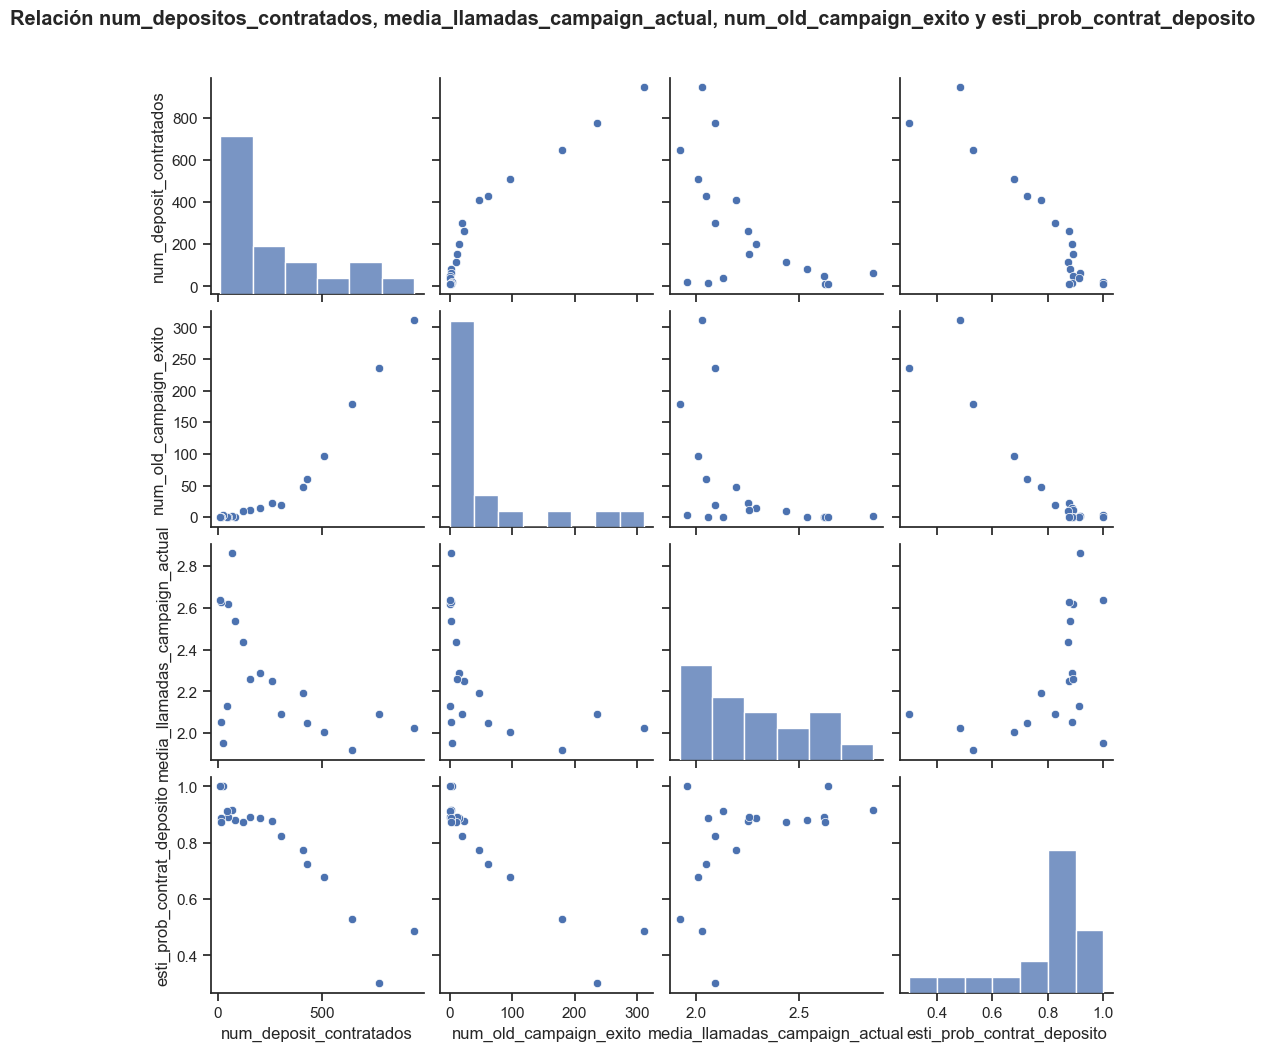

In [157]:
#La invocación más simple utiliza scatterplot()para cada emparellament de variables i histplot()pels gràfics marginals al llarg de la diagonal:
plt.figure(figsize=(10, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)              
plot=sns.pairplot(data=dataset_tasa_conversion[filtro_tasa_convers],
            vars=["num_deposit_contratados","num_old_campaign_exito","media_llamadas_campaign_actual","esti_prob_contrat_deposito"])
 
plot.figure.suptitle("Relación num_depositos_contratados, media_llamadas_campaign_actual, num_old_campaign_exito y esti_prob_contrat_deposito",y=1.05,fontweight='bold')
 
plot.axes[0,0].set(ylabel="num_deposit_contratados")
plot.axes[1,0].set(ylabel="num_old_campaign_exito")
plot.axes[2,0].set(ylabel="media_llamadas_campaign_actual")
plot.axes[3,0].set(ylabel="esti_prob_contrat_deposito")
   
plot.axes[3,0].set(xlabel="num_deposit_contratados")
plot.axes[3,1].set(xlabel="num_old_campaign_exito")
plot.axes[3,2].set(xlabel="media_llamadas_campaign_actual") 
plot.axes[3,3].set(xlabel="esti_prob_contrat_deposito") 


In [158]:
columnes=["num_deposit_contratados","num_old_campaign_exito","media_llamadas_campaign_actual","esti_prob_contrat_deposito"]
df_matriu_correlacions=dataset_tasa_conversion[filtro_tasa_convers][columnes].corr()
df_matriu_correlacions

,num_deposit_contratados,num_old_campaign_exito,media_llamadas_campaign_actual,esti_prob_contrat_deposito
num_deposit_contratados,1.000000,0.948079,-0.569599,-0.931149
num_old_campaign_exito,0.948079,1.000000,-0.490168,-0.926856
media_llamadas_campaign_actual,-0.569599,-0.490168,1.000000,0.485646
esti_prob_contrat_deposito,-0.931149,-0.926856,0.485646,1.000000


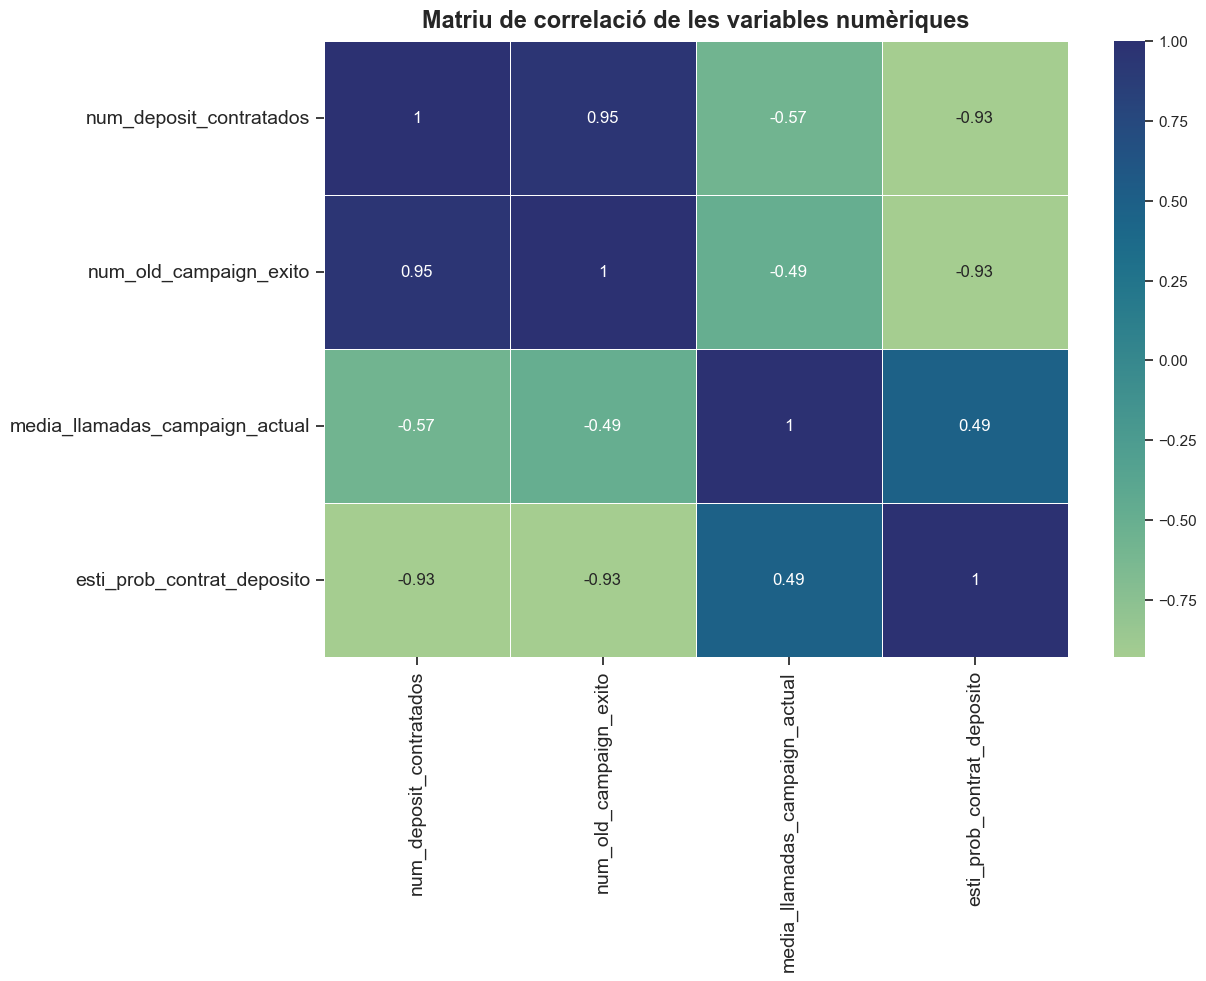

In [159]:
plt.figure(figsize=(12, 8))
grid=sns.heatmap(df_matriu_correlacions,cmap="crest",annot=True,linewidth=.5)
grid.axes.set_title("Matriu de correlació de les variables numèriques",pad=10,fontsize=17,fontweight='bold')
plt.xticks(fontsize=14, rotation=90)  # Tamaño y rotación de las etiquetas del eje x
plt.yticks(fontsize=14, rotation=0)
plt.show()

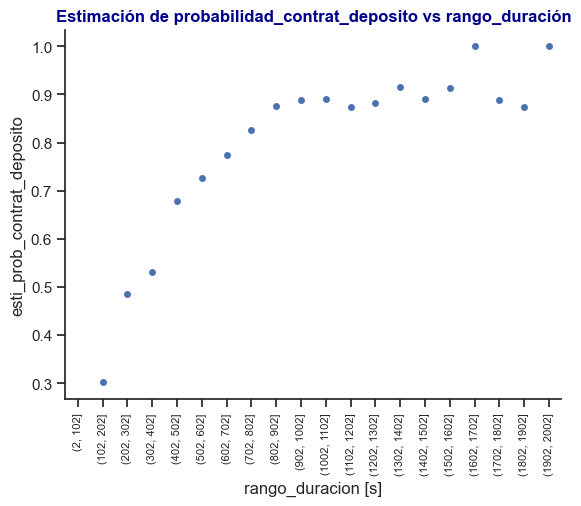

In [160]:
#g=sns.barplot(x='range_duration',y='tasa_conversion',data=dataset_tasa_conversion)

g=sns.stripplot(x='rango_duracion', y='esti_prob_contrat_deposito', data=dataset_tasa_conversion[filtro_tasa_convers])
#g=sns.catplot(x='range_duration', y='tasa_conversion', kind='bar', data=dataset_tasa_conversion, ci=None)
plt.xticks(rotation=90,fontsize=8)
ax=g.axes

#plt.title('Gráfico de barras de range_duration vs_conversión')

Títol="Estimación de probabilidad_contrat_deposito vs rango_duración"
ax.set_title(Títol,fontweight='bold',color='darkblue')
ax.set_xlabel("rango_duracion [s]")
#ax.set_ylabel("freqüència")
#ax.grid(False)
# Mostrar el gráfico
plt.show()

**A medida que aumenta el rango de duración, claramente la probabilidad de contratación va aumentando como ya intuíamos**.

Text(0.5, 0, 'rango_duracion [s]')

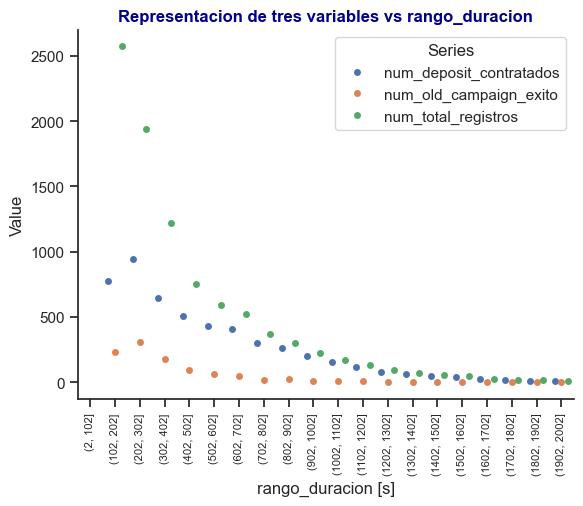

In [161]:
# Convertir a formato largo
df_long = pd.melt(dataset_tasa_conversion[filtro_tasa_convers], id_vars='rango_duracion', value_vars=['num_deposit_contratados', 'num_old_campaign_exito','num_total_registros'],
                  var_name='Series', value_name='Value')
g=sns.stripplot(x='rango_duracion', y='Value', hue='Series',data=df_long,dodge=True)
plt.xticks(rotation=90,fontsize=8)

ax=g.axes
#plt.title('Gráfico de barras de range_duration vs_conversión')
Títol="Representacion de tres variables vs rango_duracion"
ax.set_title(Títol,fontweight='bold',color='darkblue')
ax.set_xlabel("rango_duracion [s]")
#ax.set_ylabel("freqüència")
#ax.grid(False)


**Cómo puede ser que aumente la probabilidad de contratación con el aumento de los rangos de duración (ver gráfico anterior), y en cambio el número de depósitos contratados vaya decreciendo con la duración?**
 El motivo es que aunque las dos series decrecen con el tiempo (azul y verde), cada vez es más probable que una llamada se convierta en una contratación, pues el número de llamadas total y el número de registros, se igualan para rangos de tiempo más grandes. 

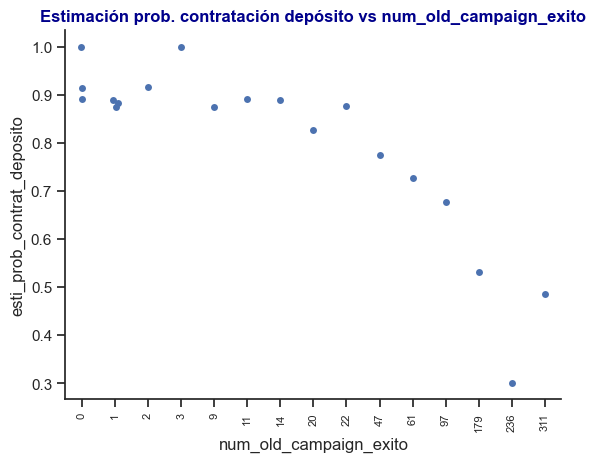

In [162]:
g=sns.stripplot(x='num_old_campaign_exito', y='esti_prob_contrat_deposito', data=dataset_tasa_conversion[filtro_tasa_convers])
#g=sns.catplot(x='range_duration', y='tasa_conversion', kind='bar', data=dataset_tasa_conversion, ci=None)
plt.xticks(rotation=90,fontsize=8)
ax=g.axes

plt.title('Gráfico de barras de range_duration vs_conversión')

Títol="Estimación prob. contratación depósito vs num_old_campaign_exito"
ax.set_title(Títol,fontweight='bold',color='darkblue')
ax.set_xlabel("num_old_campaign_exito")
#ax.set_ylabel("freqüència")
#ax.grid(False)
# Mostrar el gráfico
plt.show()


Hemos visto en la matriz de correlaciones que la estimación de probabilidad de contratación de un depósito vs núm old_campaign_exito tenía una correlación de -0.93
Eso significa que cuando aumenta el número de contrataciones de campañas anteriores la probabilidad de contratación decrece. En realidad lo que pasa es que cuado tenemos más números de exitos en campañas anteriores es en rangos de duración más pequeños (ver serie naranja del gráfico de tres series anterior) y hemos visto que para rangos de duración de llamadas más pequeños tenemos una probabilidad de contratación más baja.

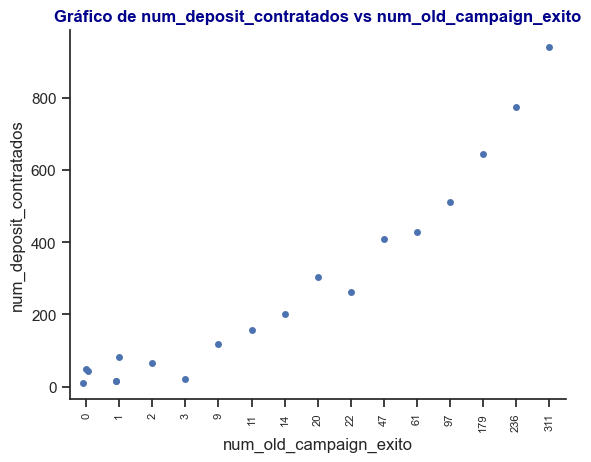

In [163]:
g=sns.stripplot(x='num_old_campaign_exito', y='num_deposit_contratados', data=dataset_tasa_conversion[filtro_tasa_convers])
#g=sns.catplot(x='range_duration', y='tasa_conversion', kind='bar', data=dataset_tasa_conversion, ci=None)
plt.xticks(rotation=90,fontsize=8)
ax=g.axes

plt.title('Gráfico de barras de range_duration vs_conversión')

Títol="Gráfico de num_deposit_contratados vs num_old_campaign_exito"
ax.set_title(Títol,fontweight='bold',color='darkblue')
ax.set_xlabel("num_old_campaign_exito")
#ax.set_ylabel("freqüència")
#ax.grid(False)
# Mostrar el gráfico
plt.show()

Lo mismo podemos decir de la relación número de depósitos contratados vs número de éxitos de campañas anteriores del gráfico siguiente. Hemos visto de la matriz de correlación, que era de un 0.95.
Es verdad que si aumentan los éxitos de campañas anteriores, más aumentan las contrataciones. Pero volvemos a lo de antes, si vamos al gráfico de las tres series, esto pasa para rangos de duración pequeñas, que es cuando la probabilidad de contratación es más baja. 

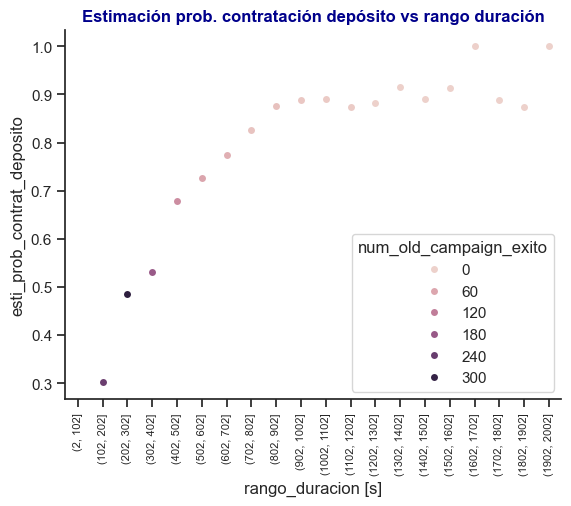

In [127]:
g=sns.stripplot(x='rango_duracion', y='esti_prob_contrat_deposito', data=dataset_tasa_conversion[filtro_tasa_convers], hue='num_old_campaign_exito')
#g=sns.catplot(x='range_duration', y='tasa_conversion', kind='bar', data=dataset_tasa_conversion, ci=None)
plt.xticks(rotation=90,fontsize=8)
ax=g.axes

plt.title('Gráfico de barras de range_duration vs_conversión')

Títol="Estimación prob. contratación depósito vs rango duración"
ax.set_title(Títol,fontweight='bold',color='darkblue')
ax.set_xlabel("rango_duracion [s]")
#ax.set_ylabel("freqüència")
#ax.grid(False)
# Mostrar el gráfico
plt.show()

## 4. Profundización del éxito de campañas anterior con poutcome difente de unknown (Pendiente si tiene sentido)

In [164]:
filtro_no_unknown= (df_BANK_marketing_sin_anomalias['poutcome']!='unknown')
filtro_no_unknown.value_counts()

df_BANK_marketing_sin_anomalias_no_unknown=df_BANK_marketing_sin_anomalias[filtro_no_unknown]
df_BANK_marketing_sin_anomalias_no_unknown

,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,recod_poutcome,descripcion_duration,descripcion_campaign,rango_duracion
890,892,telephone,21,oct,519,1,166,1,other,1,0,medio-alto,medio-bajo,"(502, 602]"
891,893,telephone,21,oct,144,1,91,4,failure,1,0,bajo,medio-bajo,"(102, 202]"
899,901,unknown,23,oct,518,1,147,2,success,1,1,medio-alto,medio-bajo,"(502, 602]"
933,935,unknown,12,nov,114,1,170,3,failure,1,0,bajo,medio-bajo,"(102, 202]"
951,953,cellular,17,nov,1091,2,150,1,success,1,1,alto,medio-alto,"(1002, 1102]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,11127,cellular,13,may,10,5,362,3,other,0,0,bajo,alto,"(2, 102]"
11133,11135,cellular,17,apr,110,1,260,5,failure,0,0,bajo,medio-bajo,"(102, 202]"
11145,11147,cellular,12,may,243,1,271,4,failure,0,0,bajo,medio-bajo,"(202, 302]"
11155,11157,cellular,21,nov,38,2,172,2,failure,0,0,bajo,medio-alto,"(2, 102]"


In [166]:
agrup_duration_bins=df_BANK_marketing_sin_anomalias_no_unknown.groupby('rango_duracion')

serie_1=agrup_duration_bins['recod_poutcome'].sum()
serie_2=agrup_duration_bins['campaign'].mean()
serie_3=agrup_duration_bins['deposit'].sum()
serie_4=agrup_duration_bins['deposit'].count()

dataset_tasa_conversion_2 = pd.concat([serie_1, serie_2, serie_3,serie_4], axis = 1)
dataset_tasa_conversion_2.columns=["num_old_campaign_exito","media_llamadas_campaign_actual","num_deposit_contratados","num_total_registros"]
dataset_tasa_conversion_2.reset_index(drop=False, inplace=True)
dataset_tasa_conversion_2


C:\Users\gorka\AppData\Local\Temp\ipykernel_40600\555748751.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrup_duration_bins=df_BANK_marketing_sin_anomalias_no_unknown.groupby('rango_duracion')


,rango_duracion,num_old_campaign_exito,media_llamadas_campaign_actual,num_deposit_contratados,num_total_registros
0,"(2, 102]",54,2.170732,50,328
1,"(102, 202]",236,1.862175,365,653
2,"(202, 302]",311,1.867692,496,650
3,"(302, 402]",179,1.685039,293,381
4,"(402, 502]",97,1.757085,206,247
5,"(502, 602]",61,1.757962,130,157
6,"(602, 702]",47,1.801527,111,131
7,"(702, 802]",20,1.958904,65,73
8,"(802, 902]",22,2.090909,59,66
9,"(902, 1002]",14,1.842105,35,38


In [170]:
dataset_tasa_conversion_2['esti_prob_contrat_deposito']=dataset_tasa_conversion['num_deposit_contratados']/dataset_tasa_conversion['num_total_registros']

In [173]:
dataset_tasa_conversion_2 = dataset_tasa_conversion_2.sort_values(by='esti_prob_contrat_deposito',ascending=False)
dataset_tasa_conversion_2

,rango_duracion,num_old_campaign_exito,media_llamadas_campaign_actual,num_deposit_contratados,num_total_registros,esti_prob_contrat_deposito
19,"(1902, 2002]",0,1.500000,2,2,1.000000
18,"(1802, 1902]",1,2.500000,2,2,1.000000
17,"(1702, 1802]",1,1.500000,2,2,1.000000
16,"(1602, 1702]",3,1.800000,5,5,1.000000
15,"(1502, 1602]",0,1.571429,7,7,1.000000
10,"(1002, 1102]",11,2.259259,25,27,0.925926
9,"(902, 1002]",14,1.842105,35,38,0.921053
12,"(1202, 1302]",1,2.250000,11,12,0.916667
8,"(802, 902]",22,2.090909,59,66,0.893939
7,"(702, 802]",20,1.958904,65,73,0.890411


In [175]:
columnes=["num_deposit_contratados","num_old_campaign_exito","media_llamadas_campaign_actual","esti_prob_contrat_deposito"]
df_matriu_correlacions=dataset_tasa_conversion_2[columnes].corr()
df_matriu_correlacions

,num_deposit_contratados,num_old_campaign_exito,media_llamadas_campaign_actual,esti_prob_contrat_deposito
num_deposit_contratados,1.000000,0.990937,-0.131108,-0.331512
num_old_campaign_exito,0.990937,1.000000,-0.112324,-0.395106
media_llamadas_campaign_actual,-0.131108,-0.112324,1.000000,-0.034547
esti_prob_contrat_deposito,-0.331512,-0.395106,-0.034547,1.000000


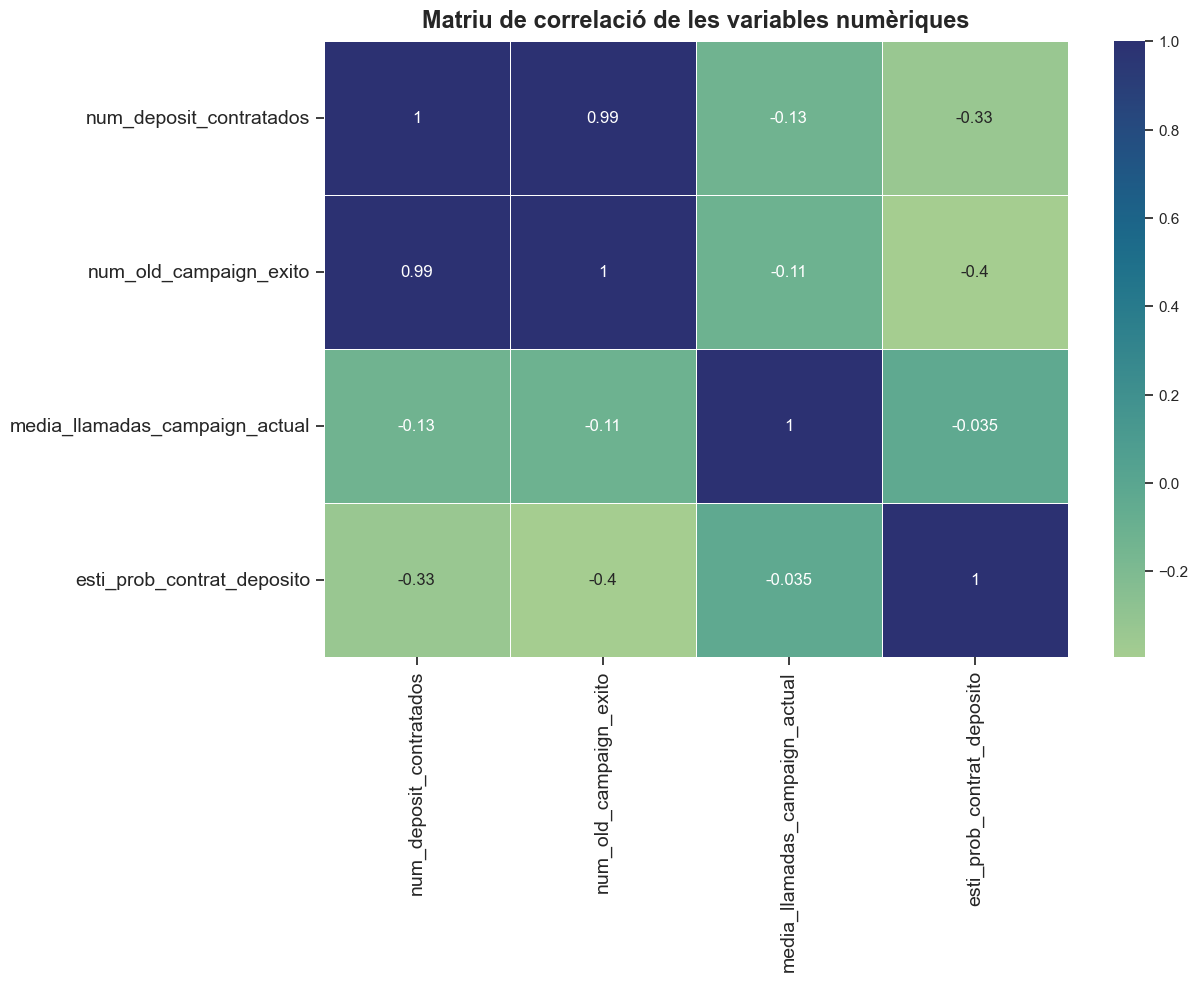

In [176]:
plt.figure(figsize=(12, 8))
grid=sns.heatmap(df_matriu_correlacions,cmap="crest",annot=True,linewidth=.5)
grid.axes.set_title("Matriu de correlació de les variables numèriques",pad=10,fontsize=17,fontweight='bold')
plt.xticks(fontsize=14, rotation=90)  # Tamaño y rotación de las etiquetas del eje x
plt.yticks(fontsize=14, rotation=0)
plt.show()

Text(0.5, 0, 'rango_duracion [s]')

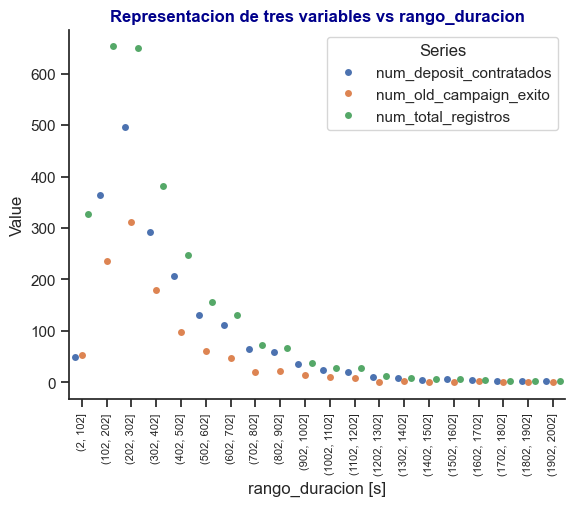

In [177]:
# Convertir a formato largo
df_long = pd.melt(dataset_tasa_conversion_2, id_vars='rango_duracion', value_vars=['num_deposit_contratados', 'num_old_campaign_exito','num_total_registros'],
                  var_name='Series', value_name='Value')
g=sns.stripplot(x='rango_duracion', y='Value', hue='Series',data=df_long,dodge=True)
plt.xticks(rotation=90,fontsize=8)

ax=g.axes
#plt.title('Gráfico de barras de range_duration vs_conversión')
Títol="Representacion de tres variables vs rango_duracion"
ax.set_title(Títol,fontweight='bold',color='darkblue')
ax.set_xlabel("rango_duracion [s]")
#ax.set_ylabel("freqüència")
#ax.grid(False)


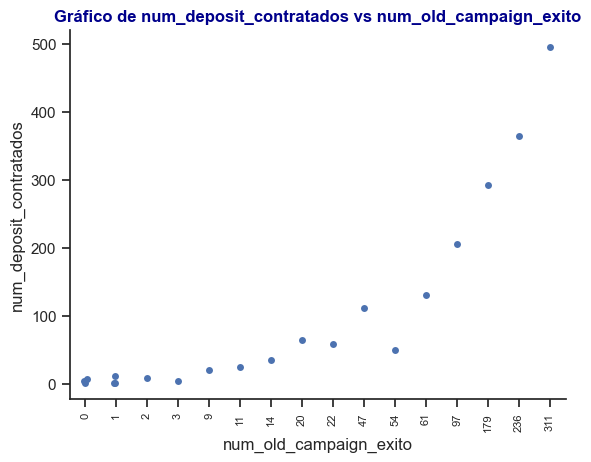

In [178]:
g=sns.stripplot(x='num_old_campaign_exito', y='num_deposit_contratados', data=dataset_tasa_conversion_2)
#g=sns.catplot(x='range_duration', y='tasa_conversion', kind='bar', data=dataset_tasa_conversion, ci=None)
plt.xticks(rotation=90,fontsize=8)
ax=g.axes

plt.title('Gráfico de barras de range_duration vs_conversión')

Títol="Gráfico de num_deposit_contratados vs num_old_campaign_exito"
ax.set_title(Títol,fontweight='bold',color='darkblue')
ax.set_xlabel("num_old_campaign_exito")
#ax.set_ylabel("freqüència")
#ax.grid(False)
# Mostrar el gráfico
plt.show()